# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
#~~Project Description: Analyze data for Sports and Athletics in Ann Arbor, MI, USA.
#~~Specific Project: I plan to plot and analyze relationships between Payroll, Win Rate, and Home Attendance for the Detroit Tigers

In [2]:
#~~Data Sources:
# Detroit Tiger Roster Payroll: https://legacy.baseballprospectus.com/compensation/cots/american-league/detroit-tigers/
# Detroit Tiger Home Attendance: https://en.wikipedia.org/wiki/Detroit_Tigers#Home_attendance
# Detroit Tiger Season Win Loss: https://en.wikipedia.org/wiki/List_of_Detroit_Tigers_seasons#Record_season-by-season

#~~Future additions:
# Especially over longer data periods where inflation is more prevalent, it would probably be smart to
# look at the Payroll as a relation to the MLB average payroll. That way it won't appear as if the dollars are constant

In [3]:
%matplotlib notebook
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [4]:
#~~Read all the data in
dfpay = pd.read_csv('Payroll.csv')
dfseason = pd.read_csv('Win Loss.csv')
dfattend = pd.read_csv('Home Attendance.csv')

print(dfpay.head())
print(dfseason.head())
print(dfattend.head())

   Year     Opening Day 26    Year End 40-man      CB Tax 40-man
0  2021  $ 81,000,000 (24)              $ ( )  $ 98,000,000 (24)
1  2020  $ 43,442,519 (21)  $ 44,920,345 (22)  $119,860,487 (22)
2  2019  $115,118,500 (22)  $117,097,633 (21)  $128,891,911 (23)
3  2018  $125,286,000 (19)  $133,020,546 (17)  $135,349,421 (20)
4  2017  $199,750,600 ( 2)  $190,815,585 ( 3)  $207,204,947 ( 3)
   Season Level League Division Finish  Wins  Losses   Win%  GB Post-Season  \
0    2000   MLB     AL  Central    3rd    79      83  0.488  16         NaN   
1    2001   MLB     AL  Central    4th    66      96  0.407  25         NaN   
2    2002   MLB     AL  Central    5th    55     106  0.342  39         NaN   
3    2003   MLB     AL  Central    5th    43     119  0.265  47         NaN   
4    2004   MLB     AL  Central    4th    72      90  0.444  20         NaN   

  Awards  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
   Year Total attendance Game average League rank
0  2000        2,43

In [5]:
#~~Clean the payroll dataframe. Remove 2021 (season just started) and 2020 (COVID impacted MLB season) entirely.
dfpay.drop(dfpay[(dfpay['Year']==2021)|(dfpay['Year']==2020)].index,inplace=True)
#~~Get rid of $ signs and citation spots from the payment
dfpay['OpenDayPay']=dfpay['Opening Day 26'].str.replace('\$|\(.*\)|\,','').astype('int')
dfpay['YearEndPay']=dfpay['Year End 40-man'].str.replace('\$|\(.*\)|\,','').astype('int')
#~~Create a column for the average of the open and year end pay for my payment variable. Payroll is in Millions of Dollars
dfpay['AvgPay']=(dfpay['OpenDayPay']+dfpay['YearEndPay'])/(2*1000000)
dfpay.head()

,Year,Opening Day 26,Year End 40-man,CB Tax 40-man,OpenDayPay,YearEndPay,AvgPay
2,2019,"$115,118,500 (22)","$117,097,633 (21)","$128,891,911 (23)",115118500,117097633,116.108067
3,2018,"$125,286,000 (19)","$133,020,546 (17)","$135,349,421 (20)",125286000,133020546,129.153273
4,2017,"$199,750,600 ( 2)","$190,815,585 ( 3)","$207,204,947 ( 3)",199750600,190815585,195.283093
5,2016,"$198,593,000 ( 3)","$199,316,863 ( 4)","$212,044,266 ( 3)",198593000,199316863,198.954931
6,2015,"$172,792,250 ( 5)","$164,010,992 ( 6)","$181,612,247 ( 5)",172792250,164010992,168.401621


In [6]:
#~~Not much cleaning required on the Season df. Just renaming Season to Year and multiplying Win% to get it into actual %
dfseason.rename(columns = {'Season':'Year'},inplace=True)
dfseason['Win%']=dfseason['Win%'].astype('float64')*100
dfseason.head()

,Year,Level,League,Division,Finish,Wins,Losses,Win%,GB,Post-Season,Awards
0,2000,MLB,AL,Central,3rd,79,83,48.8,16,NaN,NaN
1,2001,MLB,AL,Central,4th,66,96,40.7,25,NaN,NaN
2,2002,MLB,AL,Central,5th,55,106,34.2,39,NaN,NaN
3,2003,MLB,AL,Central,5th,43,119,26.5,47,NaN,NaN
4,2004,MLB,AL,Central,4th,72,90,44.4,20,NaN,NaN


In [7]:
#~~Not much cleaning required on the Attendance df. Just cleaning average attendance and making to an integer
dfattend['AvgAttend']=dfattend['Game average'].str.replace('\,','').astype('int')
dfattend.head()

,Year,Total attendance,Game average,League rank,AvgAttend
0,2000,"2,438,617","30,106",7th,30106
1,2001,"1,921,305","23,720",9th,23720
2,2002,"1,503,623","18,795",12th,18795
3,2003,"1,368,245","16,892",13th,16892
4,2004,"1,917,004","23,667",9th,23667


In [8]:
#~~Joining all on Year
df = dfpay.merge(dfseason,how='inner',on='Year').merge(dfattend,how='inner',on='Year')
df = df[['Year','AvgPay','Win%','AvgAttend']]
df.set_index('Year',inplace=True)
df.head()
# df.shape

,AvgPay,Win%,AvgAttend
Year,,,
2019,116.108067,29.2,18536
2018,129.153273,39.5,22926
2017,195.283093,39.5,28662
2016,198.954931,53.4,31173
2015,168.401621,46.0,33655


In [9]:
#~~Creating a new DataFrame with mean values for a graph later
dfwithmean = df.copy()
for i in df.columns:
    dfwithmean[i+'mean']=df[i].mean()
dfwithmean.head()

,AvgPay,Win%,AvgAttend,AvgPaymean,Win%mean,AvgAttendmean
Year,,,,,,
2019,116.108067,29.2,18536,114.876418,46.665,29179.7
2018,129.153273,39.5,22926,114.876418,46.665,29179.7
2017,195.283093,39.5,28662,114.876418,46.665,29179.7
2016,198.954931,53.4,31173,114.876418,46.665,29179.7
2015,168.401621,46.0,33655,114.876418,46.665,29179.7


<IPython.core.display.Javascript object>


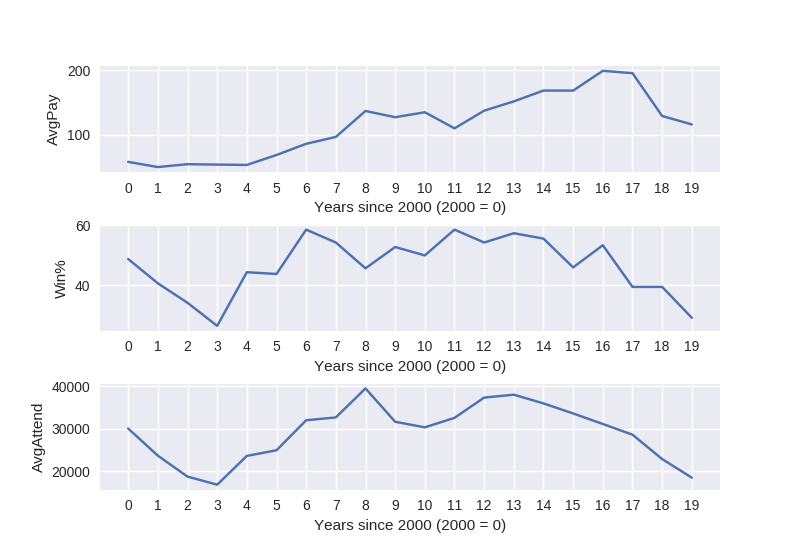

In [10]:
#~~Quick and simple plot of all 3 values over the years
fig,ax = plt.subplots(3)
fig.subplots_adjust(hspace=0.5)
for i in range(len(df.columns)):
    ax[i].plot(df.index-2000,df.iloc[:,i])
    ax[i].set_xticks(df.index-2000)
#     pxticks(rotation=45)
    ax[i].set_xlabel('Years since 2000 (2000 = 0)')
    ax[i].set_ylabel(df.columns[i])
#     ax[i].set_title('{} vs {}'.format(df.columns[i],df.index.name))
fig.show()

<IPython.core.display.Javascript object>


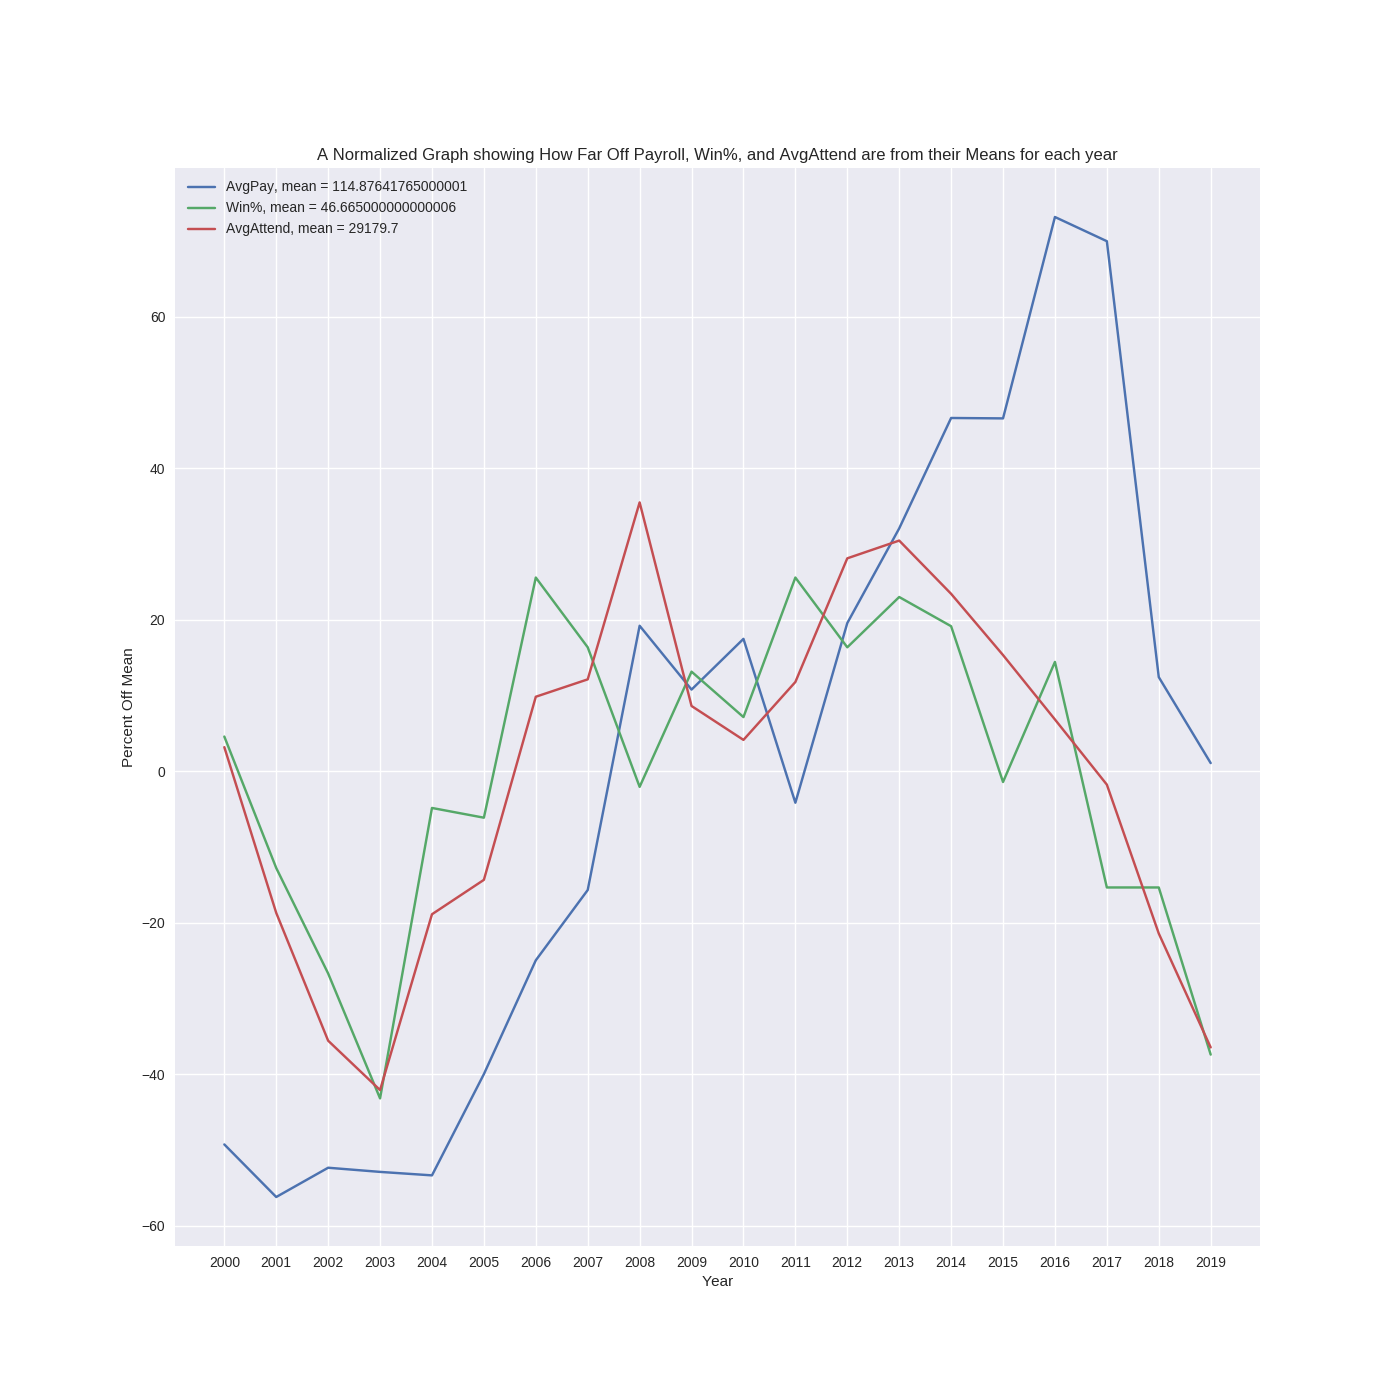

In [11]:
#~~Creating a normalized graph to show how far off from mean each value is each year
#~~This works better than overlaying graphs because the axes ranges are so different from each other
plt.figure(figsize=(14,14))
plt.xticks(dfwithmean.index)
for i in dfwithmean[['AvgPay','Win%','AvgAttend']].columns:
    plt.plot(df.index,100*(dfwithmean[i]-dfwithmean[i+'mean'])/dfwithmean[i+'mean'],label='{}, mean = {}'.format(i,dfwithmean[i+'mean'].iloc[1]))
plt.legend()
plt.ylabel('Percent Off Mean')
plt.xlabel('Year')
plt.title('A Normalized Graph showing How Far Off {}, {}, and {} are from their Means for each year'.format('Payroll','Win%','AvgAttend'))
plt.show()

In [12]:
#~~Correlate columns with each other.
def dfcorr(df):
#~~A function to return the correlation value of each column in a DF with all other columns
    cols = df.columns
    #~~I couldn't get the list comprehension to work so I split it into a couple of for loops
    #~~Use a double for loop to pull out two columns at a time and do pearson-r tests on the values that aren't null
    dasd = dict()
    dasd1 = dict()
    for k in cols:
        for i in cols:
            if i == k:
                dasd1[i]=-1
            else:
                dasd1[i]=stats.pearsonr(df[[k,i]].dropna()[k],df[[k,i]].dropna()[i])[0]

        dasd[k]=dasd1
        dasd1=dict()
    p_values=(pd.DataFrame(dasd))
    return p_values.style.set_caption('Correlation of DataFrame Columns').background_gradient(cmap='RdYlGn')

dfcorr(df)
#~~Not surprisingly, average attendance is strongly correlated with win%. Win% and pay are correlated too, but not as much.

In [13]:
#~~Function to make plots in axes.
def plotregress(yi,xi,ax=None):
    clr = [np.random.randint(1,10)/10,np.random.randint(1,10)/10,np.random.randint(1,10)/10]
    if ax == None:
        ax = plt.gca()
#     ax = ax or plot.gca()
#     fig,ax=plt.subplots()
    x=df.iloc[:,xi].values.reshape(-1,1)
    y=df.iloc[:,yi].values.reshape(-1,1)
    #~~Linear regress the x vs y data and predict against that regression to create a predicted line
    lr = LinearRegression()
    xyreg = lr.fit(x,y)
    #     print(lr.fit(x,y))
    y_p = xyreg.predict(x)
    #     print(y_p)
    #~~Plot the predicted line and scatter together with labels and such
#     plt.figure(figsize=(10,10))
    axs[xi,yi].scatter(x,y,color='grey')
    axs[xi,yi].set_title('{} vs {}'.format(df.columns[yi],df.columns[xi]),color=clr)
#     axs.set_facecolor('white')
#     axs.set_xaxis.grid(False)
#     axs.xaxis.grid(False)
    axs[xi,yi].set_xlabel(df.columns[xi])
    axs[xi,yi].set_ylabel(df.columns[yi])
    axs[xi,yi].set_xlim([min(x),max(x)])
    axs[xi,yi].plot(x,y_p,color=clr,label = 'y = ({})x + {}, {} R^2'.format(xyreg.coef_[0][0],round(xyreg.intercept_[0],2),round(xyreg.score(x,y),2)))
    axs[xi,yi].legend(loc='upper center')
#     ax=ax.gca()
#     return ax.axes
#     plt.show()

<IPython.core.display.Javascript object>


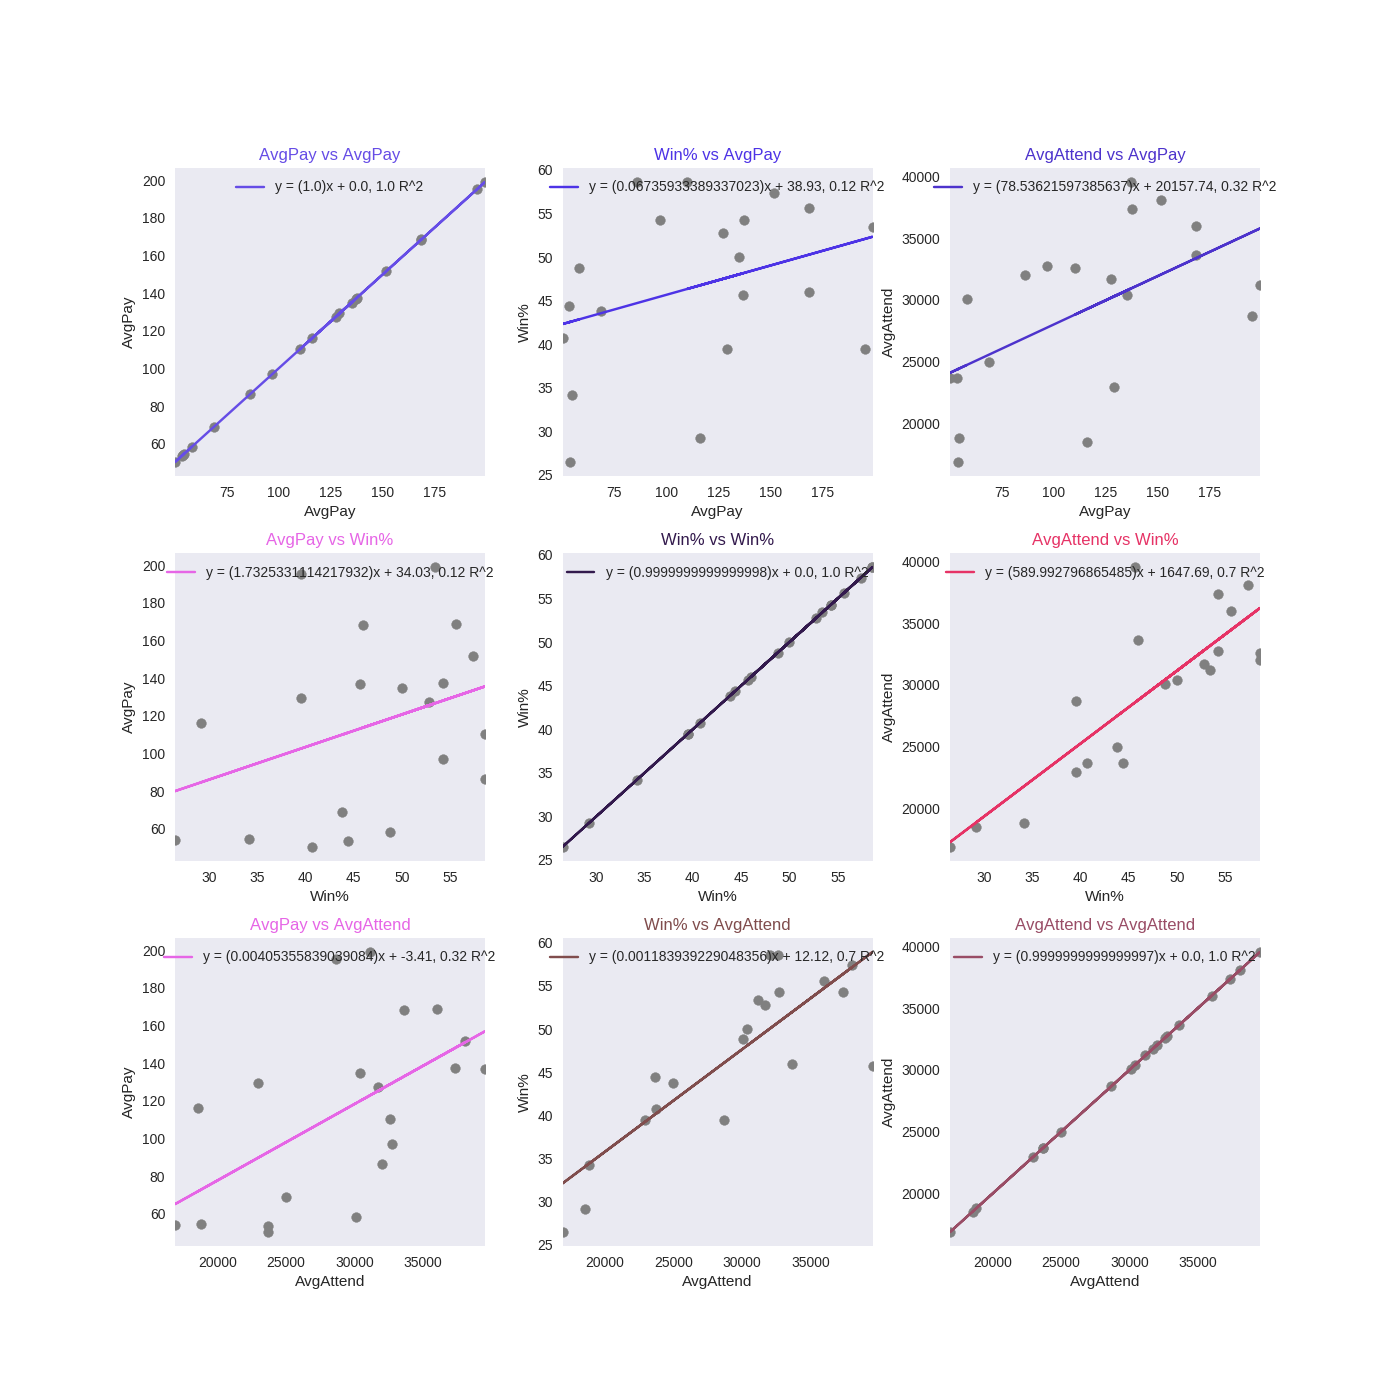

In [14]:
#~~Define a figure to house the axes from the function
# plt.figure(figsize=(14,14))
fig,axs = plt.subplots(len(df.columns),len(df.columns),figsize=(14,14))
fig.subplots_adjust(hspace=0.25,wspace=0.25)
# axs.grid(linestyle='-')
xcnt = 0
#~~Loop through to get the axes added to the figure
for i in range(len(df.columns)):
    ycnt=0
    for j in range(len(df.columns)):
#         if xcnt == ycnt:
#             continue
#         else:
            plotregress(xcnt,ycnt)
            ycnt+=1
    xcnt+=1
#~~Turn off grids for each axis in the figure
for axa in fig.axes:
    axa.grid('off')
# #     axa.set_facecolor('lightgrey')
#~~Messing around to see how figures and axes work :)
# asd = [fig.axes[i] for i in [1,2,4,5,7,8]]
# asd
# for i in asd:
#     fig.add_subplot(i)